# AutoCorrelation

This notebook examines auto-correlation measures applied to simulated neural time series.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.aperiodic import compute_autocorr
from neurodsp.sim import sim_powerlaw, sim_combined, sim_synaptic_current

In [3]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.wrappers import autocorr_wrapper
from apm.plts import plot_lines, plot_colorbar
from apm.plts.utils import truncate_colormap
from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [4]:
# Custom settings
#   Downsample frequencies and powers
FREQS = np.arange(5, 40, 10)
POWERS = np.arange(0, 2.5, 0.5)

In [5]:
# Settings for autocorrelations
ac_measure_params = {'max_lag' : 250, 'lag_step' : 1}

In [6]:
# Set the colormap for the plots
cmap_name = 'BuGn_r'
cmap_range = (0., 0.75)

# Get the requested colormap & range
cmap = truncate_colormap(plt.get_cmap(cmap_name), *cmap_range)

# Set up the colors for plotting
exp_colors = cmap(np.linspace(0., 1.0, len(EXPS)))
freq_colors = cmap(np.linspace(0., 1.0, len(FREQS)))
power_colors = cmap(np.linspace(0., 1.0, len(POWERS)))

In [7]:
# Notebook settings
SAVE_FIG = False

## Calculating AutoCorrelation on Example Signals

### Powerlaw Signals

In [8]:
# Calculate autocorrelation
times, sig_acs = compute_autocorr(SIG_AP, **ac_measure_params)

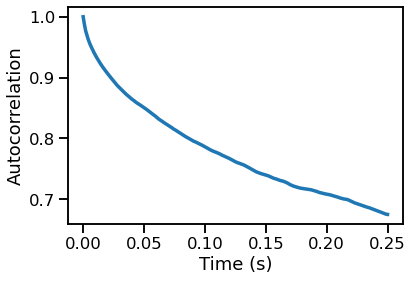

In [9]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_acs)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

### Oscillatory Signal

In [12]:
# Calculate autocorrelation
times, sig_osc = compute_autocorr(SIG_OSC, **ac_measure_params)

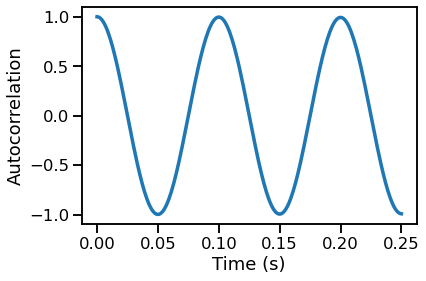

In [13]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_osc)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

### Combined Signal

In [14]:
# Calculate autocorrelation
times, sig_comb = compute_autocorr(SIG_COMB, **ac_measure_params)

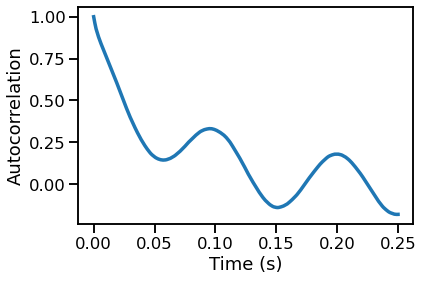

In [15]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_comb)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

### Powerlaw Signals with a Knee

In [16]:
# Calculate autocorrelation
times, sig_acs = compute_autocorr(SIG_KN, **ac_measure_params)

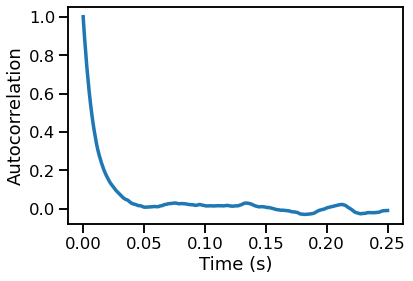

In [17]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_acs)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

## AutoCorrelation Simulations: Aperiodic Variations

### Powerlaw Signals

In [12]:
# Run a set of simulations, calculating autocorrelation across exponents
acs_pow = run_sims(sim_powerlaw, SIM_PARAMS_AP, autocorr_wrapper, ac_measure_params,
                   update='update_exp', values=EXPS, n_sims=N_SIMS)
acs_pow = np.array(acs_pow)

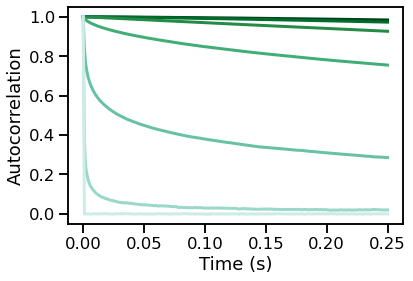

In [13]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_pow, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_exp', file_path='autocorr')

### Combined Signals

In [14]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
acs_osc = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr_wrapper, ac_measure_params,
                   update='update_comb_exp', values=EXPS, n_sims=N_SIMS)
acs_osc = np.array(acs_osc)

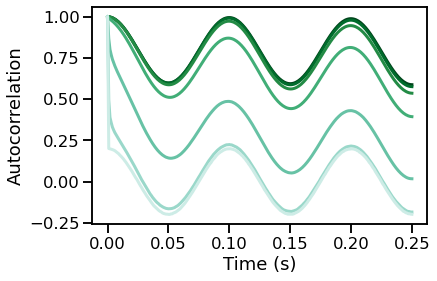

In [15]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_osc, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_comb', file_path='autocorr')

## AutoCorrelation Simulations: Periodic Variations

### Oscillation Frequency

In [16]:
# Run a set of simulations, calculating autocorrelations across oscillation frequency
sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr_wrapper, ac_measure_params,
                     update='update_freq', values=FREQS, n_sims=N_SIMS)

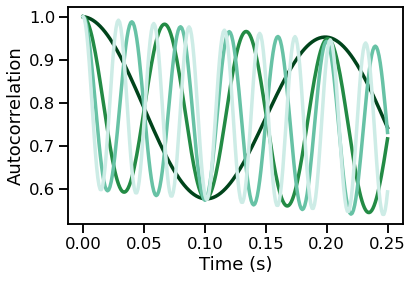

In [17]:
# Plot autocorrelation across oscillation frequency
for ac, color in zip(sims_freq, freq_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_osc_freq', file_path='autocorr')

### Oscillation Power

In [18]:
# Run a set of simulations, calculating autocorrelations across oscillation power
sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr_wrapper, ac_measure_params,
                    update='update_pow', values=POWERS, n_sims=N_SIMS)

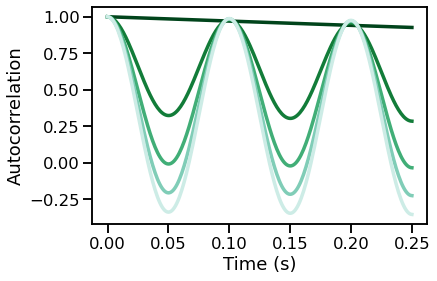

In [19]:
# Plot autocorrelation across exponent values
for ac, color in zip(sims_pow, power_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_osc_pow', file_path='autocorr')

### Create colorbars for the plots

In [20]:
# Make colorbars for the plots
plot_colorbar(cmap, min(EXPS), max(EXPS), 'exponent', show=False,
              save_fig=SAVE_FIG, file_name='acs_exp_cbar', file_path='autocorr')

# Make colorbars for the plots
plot_colorbar(cmap, min(FREQS), max(FREQS), 'frequency', show=False,
              save_fig=SAVE_FIG, file_name='acs_freq_cbar', file_path='autocorr')

# Make colorbars for the plots
plot_colorbar(cmap, min(POWERS), max(POWERS), 'power', show=False,
              save_fig=SAVE_FIG, file_name='acs_pow_cbar', file_path='autocorr')